##  Modeling the Impact of Simlpe Soil Resistance method on Total Evapotranspiration in the Reynolds Mountain East catchment using pySUMMA

## 1. Introduction

One part of the Clark et al. (2015) study explored the impact of the simple soil resistance method on total evapotranspiration (ET) using a SUMMA model for the Reynolds Mountain East catchment. 

In this Jupyter Notebook, the pySUMMA library is used to reproduce this analysis. First, the simple soil resistance method are described. Next, the Methods section describes how the pySUMMA can be used to create the results of simple soil resistance method of the Reynolds Mountain East catchment mode. The Results section shows how to use pySUMMA and the Pandas library to reproduce Figure 7 from Clark et al. (2015). 

Collectively, this Jupyter Notebook serves as an example of how hydrologic modeling can be conducted directly within a Jupyter Notebook by leveraging the pySUMMA library. 

## 2. Background

### The stomatal resistance parameterizations available in SUMMA

### 1) The simple soil resistance method

\begin{equation*}
r_{{s},{sun}} = r_{{s},{shd}} = \frac{r_{0c}}{\beta_v} \,\,\,\, 
\end{equation*}
$r_{0c} \,(s\,m^{-1})$ : the minimum stomatal resistance ,     ${\beta_v}\,(-)$ : the total soil water stress function

\begin{equation*}
{\beta_v} = \sum f_{{roots},{j}} \beta_{{v},{j}}  +  f_{roots}^{aq} \beta_{v}^{aq}
\end{equation*}
$z_{soil}$ : the soil depth, $f_{{roots},{j}}$ : the root density in the $j$-th soil layer
$\beta_{{v},{j}}$ : the water availability stress funtion in the $j$-th soil layer <br/>
$f_{roots}^{aq}$ : the fraction of roots for the aquifer, $\beta_{v}^{aq}$ : water availability stress function for the aquifer

For additional detail, see: https://github.com/uva-hydroinformatics/pysumma/tree/master/sopron_2018_notebooks/simple1.png

## 3. Methods

### 1) Install pySUMMA from GitHub (https://github.com/UW-Hydro/pysumma)

In [1]:
# On CyberGIS-Jupyter for water, pySUMMA installed, so users don't need to install pySUMMA.
import sys
!{sys.executable} -m pip install git+https://github.com/UW-Hydro/pysumma.git@master --upgrade

  Cloning https://github.com/UW-Hydro/pysumma.git (to revision master) to /tmp/pip-req-build-suylept7


  Created wheel for pysumma: filename=pysumma-3.0.0-py3-none-any.whl size=78043 sha256=d7663eb1f25ea568130d7e028de370b162bba05286a5202faf9389f766666b17
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_3koxas/wheels/70/23/92/86dfe0dd91d652a607b4e934b2f6c0938be24d0d9940de0935
Successfully built pysumma
  Attempting uninstall: pysumma
    Found existing installation: pysumma 3.0.0
    Uninstalling pysumma-3.0.0:
      Successfully uninstalled pysumma-3.0.0


### 2) Download SUMMA Model Instance from HydroShare

In [5]:
from pysumma import hydroshare_utils
import os

In [2]:
# Download SUMMA Model Instance from HydroShare
from pysumma import hydroshare_utils
import os
resource_id = 'f1a47c53f77a43e0a6ddca953de9cbb9'
instance = hydroshare_utils.get_hs_resource(resource_id, os.getcwd())

Username: choi
Password for choi: ········


In [3]:
!cd {instance}/; chmod +x ./installTestCases_local.sh
!cd {instance}/; ./installTestCases_local.sh

TestCases installed


### 3) Study Area

#### The Reynolds Mountain East catchment is located in southwestern Idaho as shown in the figure below.

<img src="SummaModel_ReynoldsAspenStand_BasicPlot/data/gis/study_area.jpg" width="1000">

In [2]:
import sys
!{sys.executable} -m pip install geoviews

     |████████████████████████████████| 500 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 5.9 MB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 70 kB 7.4 MB/s  eta 0:00:01
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

panel 0.10.1 requires bokeh>=2.2.2, but you'll have bokeh 2.2.1 which is incompatible.


Populating the interactive namespace from numpy and matplotlib


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
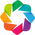

In [10]:
%pylab inline
import cartopy
import geoviews as gv
import holoviews as hv
hv.notebook_extension('bokeh')

In [11]:
shapefile = os.path.join(os.getcwd(), instance, "data/gis/Reynolds_Creek_watershed_wgs84.shp")
shapes = cartopy.io.shapereader.Reader(shapefile)
(gv.tile_sources.StamenTerrainRetina
 * gv.Shape.from_shapefile(shapefile, crs=cartopy.crs.PlateCarree(), value="LABLE", index="value").opts(
     style=dict(fill_color='honeydew', line_color='navy', alpha=0.5, cmap='Reds'))
).opts(width=900, height=500)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (value)

### 4) Create pySUMMA Simulation Object

In [8]:
import pysumma as ps

In [7]:
instance = "SummaModel_ReynoldsAspenStand_BasicPlot"
executable = "/usr/bin/summa.exe"  # This setting of summa.exe for CyberGIS-Jupyter for water "/usr/bin/summa.exe"
executable

'/usr/bin/summa.exe'

In [11]:
# path to the SUMMA filemanager file
file_manager = os.path.join(os.getcwd(), instance, 'settings/summa_fileManager_riparianAspenSimpleResistance.txt')
file_manager

'/home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/settings/summa_fileManager_riparianAspenSimpleResistance.txt'

In [12]:
# Create pySUMMA Simulation Object
S = ps.Simulation(executable, file_manager)

### 5) Run SUMMA for the different stomatal resistance parameterization options on HydroShare JH

In [13]:
# set the simulation start and finish times
S.manager['simStartTime'].value = "2003-07-01 00:00"
S.manager['simEndTime'].value = "2008-08-20 00:00"
S.manager.write()

In [14]:
print(S.manager)

controlVersion                       'SUMMA_FILE_MANAGER_V3.0.0'
simStartTime                         '2003-07-01 00:00'
simEndTime                           '2008-08-20 00:00'
tmZoneInfo                           'localTime'
settingsPath                         '/home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/settings/'
forcingPath                          '/home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/data/forcingData/'
outputPath                           '/home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/output/'
decisionsFile                        'summa_zDecisions_riparianAspenSimpleResistance.txt'
outputControlFile                    'meta/Model_Output.txt'
globalHruParamFile                   'summa_zLocalParamInfo.txt'
globalGruParamFile                   'summa_zBasinParamInfo.txt'
attributeFile                        'summa_zLocalAttributes_riparianAspen.nc'
trialParamFile                       'summa_zParamT

In [15]:
# query for the available stomatal resistance parameterizations
S.decisions["stomResist"].available_options

['BallBerry', 'Jarvis', 'simpleResistance', 'BallBerryFlex', 'BallBerryTest']

In [16]:
S.decisions['stomResist'] = 'simpleResistance'
S.manager.write()
S.decisions['stomResist'].value

'simpleResistance'

In [17]:
print(S.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    simpleResistance     ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

#### 5.1) set simple soil resistance method 

#### 5.2) review output variables and edit output variable

In [18]:
print(S.output_control)

nSnow                                | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
nSoil                                | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
pptrate                              | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
airtemp                              | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarRainPlusMelt                   | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarSWE                            | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarThroughfallSnow                | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarThroughfallRain                | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarSnowSublimation                | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarInfiltration                   | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarExfiltration                   | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarSurfaceRunoff                  | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarSurfaceTemp                    | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarSenHeatTotal                   | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarLatHeatTotal                

In [19]:
print(S.output_control['scalarSurfaceRunoff'])

scalarSurfaceRunoff                  | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0


In [20]:
# Change the output statistic from hourly instantaneous to daily total
S.output_control['scalarSurfaceRunoff'] = [24, 1, 0, 0, 0, 0, 0, 0]
print(S.output_control['scalarSurfaceRunoff'])

scalarSurfaceRunoff                  | 24 | 1 | 0 | 0 | 0 | 0 | 0 | 0


In [21]:
S.output_control['scalarSurfaceRunoff'] = [1, 0, 1, 0, 0, 0, 0, 0]
print(S.output_control['scalarSurfaceRunoff'])

scalarSurfaceRunoff                  | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0


#### 5.3) run the model with giving the run_suffix "simpleResistance"

In [22]:
# simulate SUMMA
S.run('local', run_suffix='_simpleResistance')

In [23]:
# check the status of SUMMA simulation
print(S.stdout)

file_suffix is '_simpleResistance'.
file_master is '/home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/settings/.pysumma/_simpleResistance/summa_fileManager_riparianAspenSimpleResistance.txt'.
   1 controlVersion: SUMMA_FILE_MANAGER_V3.0.0
   2 simStartTime: 2003-07-01 00:00
   3 simEndTime: 2008-08-20 00:00
   4 tmZoneInfo: localTime
   5 settingsPath: /home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/settings/.pysumma/_simpleResistance/
   6 forcingPath: /home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/data/forcingData/
   7 outputPath: /home/jovyan/work/First_Paper/SummaModel_ReynoldsAspenStand_BasicPlot/output/
   8 decisionsFile: summa_zDecisions_riparianAspenSimpleResistance.txt
   9 outputControlFile: meta/Model_Output.txt
  10 globalHruParamFile: summa_zLocalParamInfo.txt
  11 globalGruParamFile: summa_zBasinParamInfo.txt
  12 attributeFile: summa_zLocalAttributes_riparianAspen.nc
  13 trialParamFile: summa_zParamTrial

## 4. pySUMMA plotting

In [24]:
from pysumma.plotting.plotting import Plotting
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

#### 4.1) Description of output variables
1) variable (time, hru or gru) : [example] pptrate, airtemp, scalarCanopyEvaporation, ...

2) variable (time, midToto, hru) : [example] mLayerTemp, mLayerVolFracIce, mLayerVolFracLiq, mLayerVolFracWat, ...

- 'mid' are associated with variables that are specified at the mid-point of each layer (or layer-average)
- 'Toto indicate snow layers, soil layers.
3) variable (time, midSoil, hru) : [example] mLayerMatricHead, mLayerLiqFluxSoil

4) variable (time, ifcToto, hru) : [example] iLayerHeight

- 'ifc' are associated with variables that are specified at the interfaces between layers including the very top and bottom

5) variable (time, ifcSoil, hru) : [example] iLayerLiqFluxSoil

In [25]:
# explore SUMMA output : Dimenstions, Data variables etc
results_simpleResistance_ncfile = S.get_output_files()
results_simpleResistance = xr.open_dataset(results_simpleResistance_ncfile[0])
results_simpleResistance

<xarray.Dataset>
Dimensions:                    (gru: 1, hru: 1, ifcSoil: 9, ifcToto: 14, midSoil: 8, midToto: 13, time: 45049)
Coordinates:
  * time                       (time) datetime64[ns] 2003-07-01 ... 2008-08-20
  * hru                        (hru) int32 1
  * gru                        (gru) int32 1
Dimensions without coordinates: ifcSoil, ifcToto, midSoil, midToto
Data variables:
    pptrate                    (time, hru) float64 ...
    airtemp                    (time, hru) float64 ...
    basin__SurfaceRunoff       (time, gru) float64 ...
    basin__ColumnOutflow       (time, gru) float64 ...
    basin__AquiferStorage      (time, gru) float64 ...
    basin__AquiferRecharge     (time, gru) float64 ...
    basin__AquiferBaseflow     (time, gru) float64 ...
    basin__AquiferTranspire    (time, gru) float64 ...
    averageInstantRunoff       (time, gru) float64 ...
    averageRoutedRunoff        (time, gru) float64 ...
    nSnow                      (time, hru) int32 ...
    nSoil                      (time, hru) int32 ...
    scalarSWE                  (time, hru) float64 ...
    mLayerTemp                 (time, midToto, hru) float64 ...
    mLayerVolFracIce           (time, midToto, hru) float64 ...
    mLayerVolFracLiq           (time, midToto, hru) float64 ...
    mLayerVolFracWat           (time, midToto, hru) float64 ...
    mLayerMatricHead           (time, midSoil, hru) float64 ...
    scalarSurfaceTemp          (time, hru) float64 ...
    mLayerDepth                (time, midToto, hru) float64 ...
    iLayerHeight               (time, ifcToto, hru) float64 ...
    scalarSenHeatTotal         (time, hru) float64 ...
    scalarLatHeatTotal         (time, hru) float64 ...
    scalarSnowSublimation      (time, hru) float64 ...
    scalarCanopyTranspiration  (time, hru) float64 ...
    scalarCanopyEvaporation    (time, hru) float64 ...
    scalarGroundEvaporation    (time, hru) float64 ...
    scalarThroughfallSnow      (time, hru) float64 ...
    scalarThroughfallRain      (time, hru) float64 ...
    scalarRainPlusMelt         (time, hru) float64 ...
    scalarInfiltration         (time, hru) float64 ...
    scalarExfiltration         (time, hru) float64 ...
    scalarSurfaceRunoff        (time, hru) float64 ...
    iLayerLiqFluxSoil          (time, ifcSoil, hru) float64 ...
    mLayerLiqFluxSoil          (time, midSoil, hru) float64 ...
    hruId                      (hru) int64 ...
    gruId                      (gru) int64 ...
Attributes:
    summaVersion:     v3.0.0
    buildTime:        Wed Jul 29 15:28:12 UTC 2020
    gitBranch:        master-0-ga843a8c
    gitHash:          a843a8c46484d47979f8cb8e48b82ef71a177894
    soilStress:       NoahType
    stomResist:       simpleResistance
    num_method:       itertive
    fDerivMeth:       analytic
    LAI_method:       specified
    f_Richards:       mixdform
    groundwatr:       noXplict
    hc_profile:       constant
    bcUpprTdyn:       nrg_flux
    bcLowrTdyn:       zeroFlux
    bcUpprSoiH:       liq_flux
    bcLowrSoiH:       drainage
    veg_traits:       CM_QJRMS1988
    canopyEmis:       difTrans
    snowIncept:       lightSnow
    windPrfile:       logBelowCanopy
    astability:       louisinv
    canopySrad:       BeersLaw
    alb_method:       varDecay
    snowLayers:       CLM_2010
    compaction:       anderson
    thCondSnow:       jrdn1991
    thCondSoil:       mixConstit
    spatial_gw:       localColumn
    subRouting:       timeDlay
    notPopulatedYet:  notPopulatedYet

#### 4.2) Time Seris Plotting

#### 1) time series plot (variable, hru_num) : [example] pptrate, airtemp, ...

In [26]:
# create a pySUMMA plotting object using the SUMMA output NetCDF file 
P = Plotting(results_simpleResistance_ncfile[0])

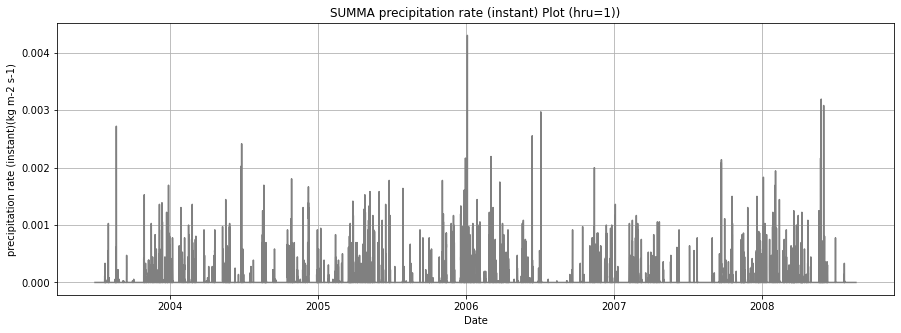

In [27]:
# timeseries plot with precipitaiton variable and hru 1
P.ts_plot('pptrate', hru_num = 0)

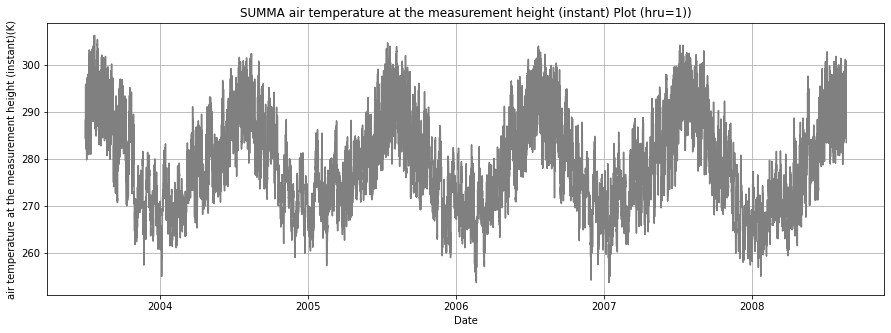

In [28]:
# timeseries plot with air temperature variable and hru 1
P.ts_plot('airtemp', hru_num = 0)

#### 2) time series plot (variable, layer_num, hru_num) : [example] mLayerTemp, mLayerMatricHead, mLayerLiqFluxSoil...

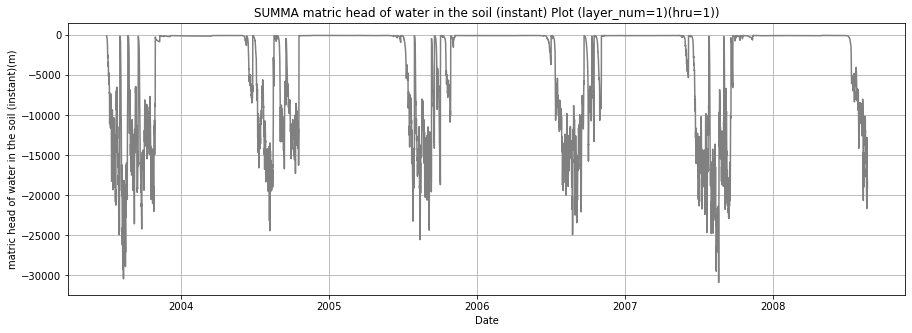

In [29]:
# timeseries plot with Matric head of water in the soil with soil layer and hru number
P.ts_plot_layer('mLayerMatricHead', layer_num = 0, hru_num = 0)

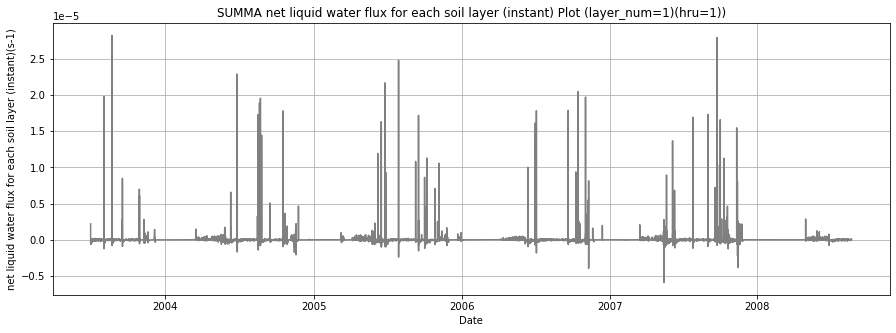

In [30]:
# timeseries plot with net liquid water flux for each soil layer with soil layer and hru number
P.ts_plot_layer('mLayerLiqFluxSoil', layer_num = 0, hru_num = 0)

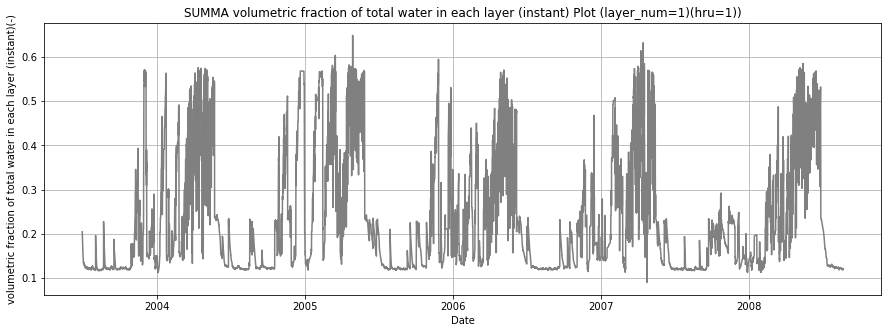

In [31]:
# timeseries plot with net liquid water flux for each soil layer with soil layer and hru number
P.ts_plot_layer('mLayerVolFracWat', layer_num = 0, hru_num = 0)

#### 4.3) 2D Plotting

In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### 1) heat map plot (plot for variable that include layer parameter : midToto, midSoil, ifcSoil, ifcToto)

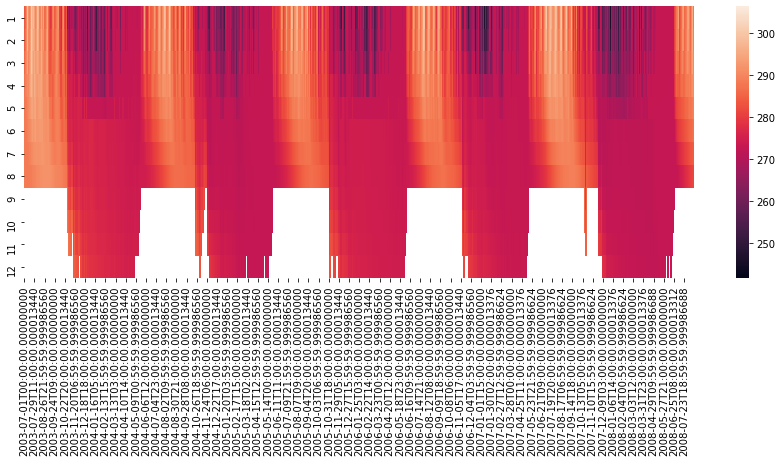

In [33]:
# heatmap plot using seaborn python library with temperature of each layer(unit:K), midToto layer, and hru 2
P.heatmap_plot('mLayerTemp', 'midToto', hru_num = 0)

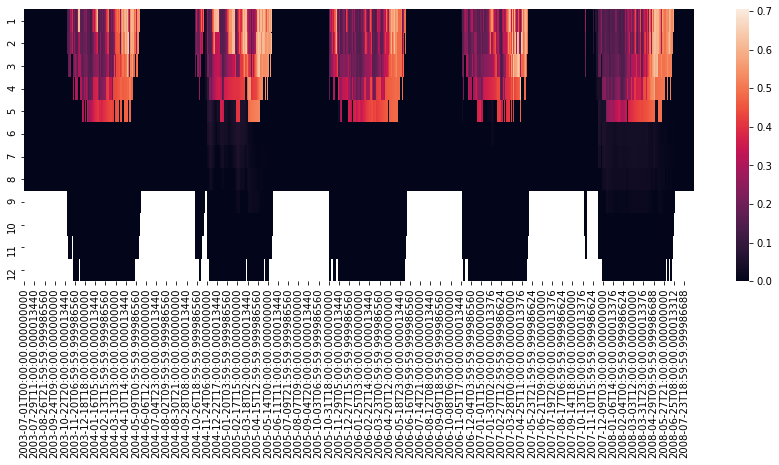

In [34]:
# heatmap plot using seaborn python library with volumetric fraction of ice in each layer, midToto layer, and hru 4
P.heatmap_plot('mLayerVolFracIce', 'midToto', hru_num = 0)

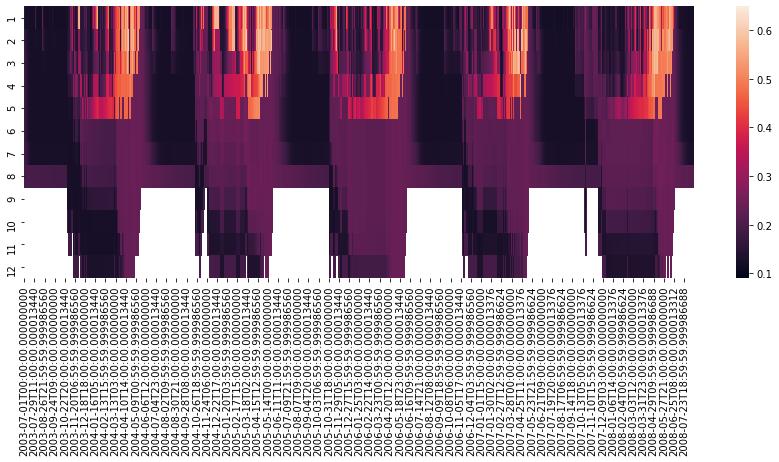

In [35]:
# heatmap plot using seaborn python library with volumetric fraction of total water in each layer, midToto layer, and hru 4
P.heatmap_plot('mLayerVolFracWat', 'midToto', hru_num = 0)

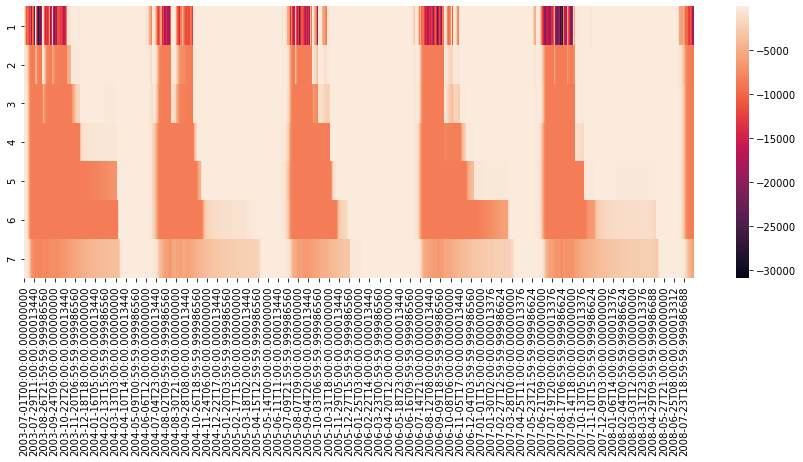

In [36]:
# heatmap plot using seaborn python library with matric head of water in the soil(unit:m), midToto layer, and hru 1
P.heatmap_plot('mLayerMatricHead', 'midSoil', hru_num = 0)

## 5. Results

### Recreate the Figure 7 plot from Clark et al., 2015: The total ET for the simple soil resistance as stomatal resistance methods

#### 5.1) Create function to calculate Total ET from SUMMA output

In [37]:
# Create Method to Calculate Total ET for Each Hour of Day from SUMMA Output
def calc_total_et(et_output_df):
    total_et_data = (et_output_df['scalarLatHeatTotal'])*3600/2260000
    # create dates(X-axis) attribute from ouput netcdf
    dates = total_et_data.coords['time'].data
    # create data value(Y-axis) attribute from ouput netcdf
    data_values = total_et_data.data
    # create two dimensional tabular data structure 
    total_et_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    total_et_df.index = total_et_df.index.round("H")
    # set the time period to display plot 
    total_et_df = total_et_df.loc["2007-05-31 23:00:00":"2007-08-20 23:00:00"]
    # resample data by the average value hourly
    total_et_df_hourly = total_et_df.resample("H").mean()
    # resample data by the average for hour of day
    total_et_by_hour = total_et_df_hourly.groupby(total_et_df_hourly.index.hour).mean()
    total_et_by_hour.index.name = 'hour'
    total_et_by_hour.columns = ['ET']
    # calculate 3 hour moving average
    total_et_by_hour.loc[24] = total_et_by_hour.loc[0].values
    for index in range(1,24,1):
        total_et_by_hour['ET'][index] = (total_et_by_hour['ET'][index-1]+total_et_by_hour['ET'][index]+total_et_by_hour['ET'][index+1])/3
    return total_et_by_hour

#### 5.2) Get hour of day output of the three stomatal resistance methods for the period 1 June to 20 August 2007

In [38]:
simResis_hour = calc_total_et(results_simpleResistance)

#### 5.3) Plotting output of simple soil resistance method as stomatal resistance parameterizations

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

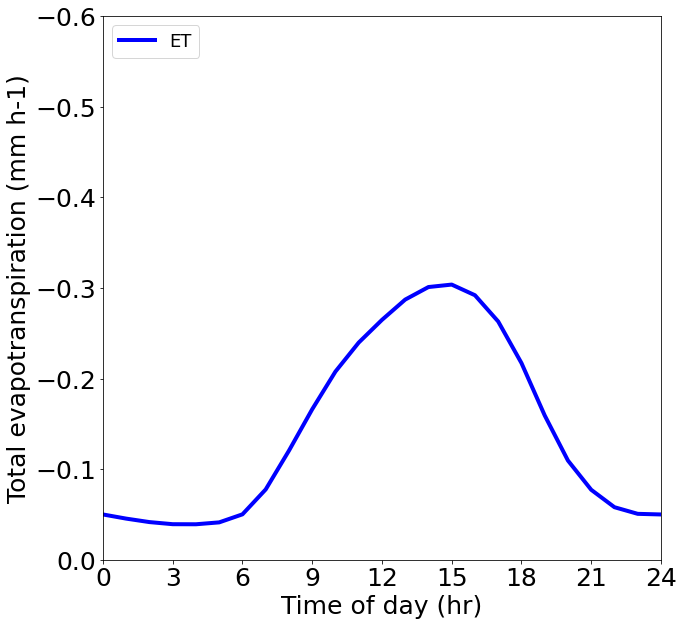

In [39]:
# create plot with three different stomatal resistance parameterizations
simResis_hour_Graph = simResis_hour.plot(color=['blue'],linewidth=4.0,figsize=(10,10))
# invert y axis
simResis_hour_Graph.invert_yaxis()
# add x, y label
plt.xlabel('Time of day (hr)', fontsize=25)
plt.ylabel('Total evapotranspiration (mm h-1)', fontsize=25)
# show up the legend
simResis_hour_Graph.legend(fontsize=18, loc=2)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, fontsize=25)
plt.yticks(fontsize=25)

## 6. Post a new Model Instance, SUMMA output, and notebook back to Hydroshare

In [53]:
from pysumma.hydroshare import hydroshare
hs = hydroshare.hydroshare()

Successfully established a connection with HydroShare


#### Create new Model Instance Resource included new SUMMA input and output

In [54]:
# zip a new SUMMA Model Instance to upload on HydroShare
import shutil, os
archive_name = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance +'_new'))
root_dir = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance))
shutil.make_archive(archive_name, 'zip', root_dir)
Model_instance = os.getcwd() +'/' + instance +'_new.zip'

In [55]:
# set meta data such as abstract, title, keywords, rtype to create a new SUMMA Model Instance
title = 'Results to simlpe soil resistance method of SUMMA Model in Aspen stand at Reynolds Mountain East_new'
abstract = 'Results to simlpe soil resistance method of SUMMA Model in Aspen stand at Reynolds Mountain East(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'simlpe soil resistance method', 'Evapotranspiration')
rtype = 'ModelInstanceResource'
fpath = Model_instance,
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [56]:
# create a new SUMMA Model Instance on HydroShare
resource_id1 = hs.createHydroShareResource(title=title, content_files=fpath, keywords=keywords, abstract=abstract, resource_type='modelinstanceresource', public=False)

Resource Created Successfully                           


#### Create new Composite Resource included new Jupyter Notebook

In [57]:
# set a new notebook to a new SUMMA Composite Resource.
npath = os.getcwd() +'/SummaModel_ReynoldsAspennStand_StomatalResistance_Basic_Plot.ipynb'

In [58]:
# set meta data such as abstract, title, keywords, rtype to create a SUMMA Composite Resource that contains SUMMA Model instance, output, and notebook.
title = 'Results to simlpe soil resistance method of SUMMA Model in Aspen stand at Reynolds Mountain East_new'
abstract = 'Results to simlpe soil resistance method of SUMMA Model in Aspen stand at Reynolds Mountain East'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'simlpe soil resistance method', 'Evapotranspiration')
#rtype = 'GenericResource'
rtype = 'CompositeResource'
files = npath,
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [59]:
# create a new SUMMA Composite Resource on HydroShare
resource_id2 = hs.createHydroShareResource(title=title, content_files=files, keywords=keywords, abstract=abstract, resource_type='compositeresource', public=False)

Resource Created Successfully                           
